In [ ]:
# @title
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

✅ 授權成功！

🔄 正在讀取票箱資料...
✔️ 成功讀取 8 筆投票紀錄。

🔍 正在進行計票...

==================【 選舉結果官方報告 】==================
總投票數 (含棄權/廢票): 8 票
總有效票數 (計入當選門檻): 8 票
---------------------------------------------------------
各選項得票詳情：
  - 同意: 6 票
  - 廢票/棄權: 1 票
  - 不同意: 1 票

🎨 正在產生視覺化儀表板圖表...
字體載入成功。

🎉🎉🎉 成功產出選舉儀表板！圖檔已儲存為 'election_results_dashboard.png'。
您可以從 Colab 左側的檔案列表中下載此圖檔，用於正式公告。


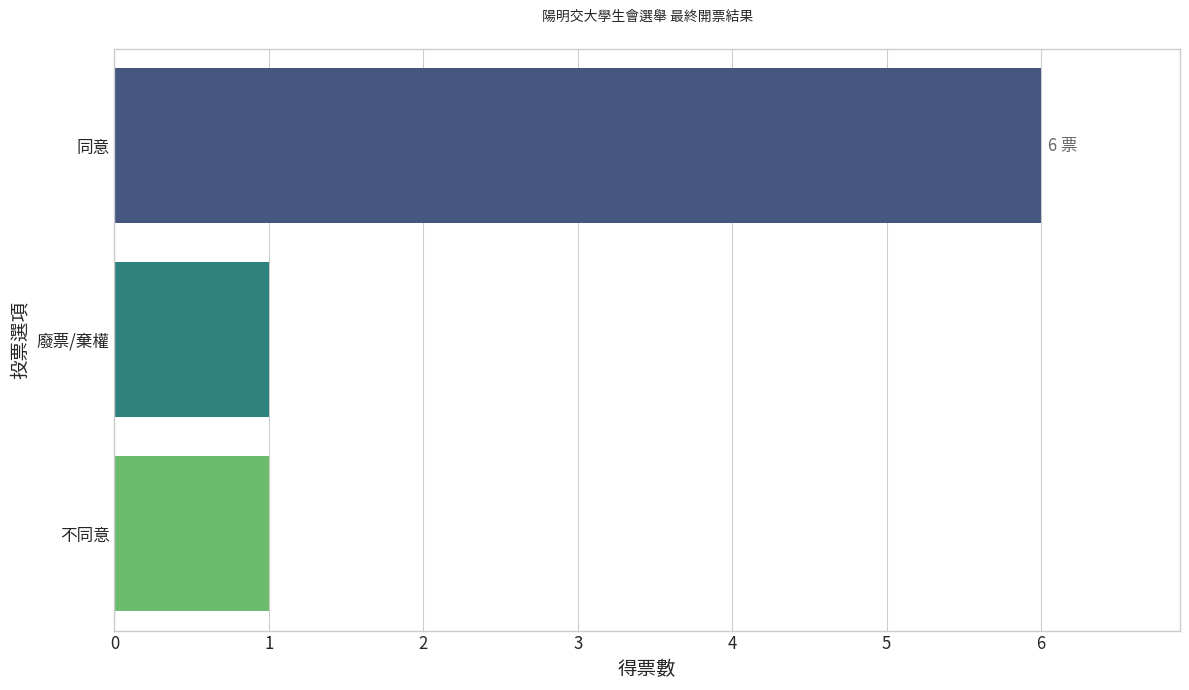

In [ ]:
# @title
# =======================================================================
#           學生會選舉 - 自動計票與視覺化儀表板 (v5 - 精準字體設定)
# =======================================================================
#
# 使用說明：
# 1. 將此程式碼完整貼到 Google Colab 的一個新 Notebook 中。
# 2. 修改下方的「設定區」，填入您的 [票箱] Google Sheet 的 ID。
# 3. 點擊 "執行階段" -> "全部執行"，即可得到最終的計票報告與圖表。
#
# v5 版修正項目：
# - 根據使用者提供的建議，改為將字體屬性直接傳遞給各個繪圖元件。
# - 這種方法更穩定，能有效避免字體快取問題。
#
# =======================================================================

# --- 步驟一：安裝、匯入與授權 ---

# 安裝讀取 Google Sheets 所需的套件 (-q 參數可隱藏安裝過程的冗長訊息)
!pip install --upgrade gspread -q

# 匯入所需函式庫
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
import os
import requests

# 忽略不必要的警告訊息，讓輸出更乾淨
warnings.filterwarnings('ignore')

# 授權 Colab 存取您的 Google 帳號
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

print("✅ 授權成功！")

# --- 步驟二：設定您的票箱 ---

# ★★★★★★★★★★★★★★★★ 設定區 ★★★★★★★★★★★★★★★★
# 請將 YOUR_BALLOT_BOX_SHEET_ID 換成您 [票箱] 匿名投票結果 Google Sheet 的 ID
BALLOT_BOX_SHEET_ID = "1iFgLsnl44v_1nA0auZZL8gBwLdBO_MVIJ0vKn_RqhqY"
# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

try:
    print("\n🔄 正在讀取票箱資料...")
    # 使用 Sheet ID 開啟 Google Sheet
    worksheet = gc.open_by_key(BALLOT_BOX_SHEET_ID).sheet1

    # 將所有資料讀取為一個 DataFrame
    rows = worksheet.get_all_values()
    # 檢查是否有資料，避免空白工作表報錯
    if len(rows) < 2:
        raise ValueError("工作表是空的或只有標題列，無法進行計票。")

    df = pd.DataFrame(rows[1:], columns=rows[0])

    print(f"✔️ 成功讀取 {len(df)} 筆投票紀錄。")

    # --- 步驟三：計票與分析 ---

    print("\n🔍 正在進行計票...")
    # 假設投票選項的欄位名稱為 'Candidate_Vote'
    vote_column = 'Candidate_Vote'

    # 檢查計票欄位是否存在
    if vote_column not in df.columns:
        raise ValueError(f"找不到名為 '{vote_column}' 的欄位，請檢查您的 Google Sheet。")

    # 計算每個選項的票數
    vote_counts = df[vote_column].value_counts().reset_index()
    vote_counts.columns = ['投票選項', '得票數']

    # 將 '得票數' 欄位轉換為數值型態
    vote_counts['得票數'] = pd.to_numeric(vote_counts['得票數'])

    # 計算總有效投票數 (排除空白/棄權票)
    # 這裡我們假設 '棄權' 是唯一的棄權選項
    valid_votes_df = vote_counts[~vote_counts['投票選項'].isin(['棄權'])]
    total_valid_votes = valid_votes_df['得票數'].sum()


    # 輸出文字報告
    print("\n==================【 選舉結果官方報告 】==================")
    print(f"總投票數 (含棄權/廢票): {len(df)} 票")
    print(f"總有效票數 (計入當選門檻): {total_valid_votes} 票")
    print("---------------------------------------------------------")
    print("各選項得票詳情：")
    # 將 DataFrame 轉成更易讀的格式
    for index, row in vote_counts.iterrows():
        print(f"  - {row['投票選項']}: {row['得票數']} 票")
    print("=========================================================\n")


    # --- 步驟四：視覺化儀表板 ---

    print("🎨 正在產生視覺化儀表板圖表...")

    # 【中文顯示修正 v5】載入字體檔，並將其作為屬性傳遞給繪圖元件
    myfont = None
    try:
        font_url = "https://github.com/google/fonts/raw/main/ofl/taipeisansstcbeta/TaipeiSansTCBeta-Regular.ttf"
        font_path = "TaipeiSansTCBeta-Regular.ttf"

        if not os.path.exists(font_path):
            print(f"正在下載中文字體: {font_path}...")
            r = requests.get(font_url, allow_redirects=True)
            r.raise_for_status()
            with open(font_path, 'wb') as f:
                f.write(r.content)

        # 建立字體屬性物件
        myfont = fm.FontProperties(fname=font_path)
        print("字體載入成功。")

    except Exception as font_e:
        print(f"⚠️ 下載或設定字體時發生錯誤: {font_e}")
        print("將使用預設字體，中文可能無法顯示。")

    # 設定圖表樣式
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

    # 建立圖表畫布
    fig, ax = plt.subplots(figsize=(12, 7))

    # 將結果排序後繪製長條圖
    vote_counts_sorted = vote_counts.sort_values(by='得票數', ascending=False)

    sns.barplot(x='得票數', y='投票選項', hue='投票選項', data=vote_counts_sorted, palette='viridis', orient='h', ax=ax, legend=False)

    # 【AttributeError 修正】在新版 Matplotlib 中，需從 ax.containers[0] 獲取長條圖物件
    if ax.containers:
        ax.bar_label(
            ax.containers[0],
            fmt='%d 票',
            padding=5,
            fontsize=12,
            color='dimgray',
            fontproperties=myfont # 為長條圖標籤設定字體
        )
    else:
        print("⚠️ 警告：圖表中沒有可標記的資料。")

    # 【字體修正】將字體屬性分別應用到各個標題與標籤
    ax.set_title('陽明交大學生會選舉 最終開票結果', fontsize=20, fontweight='bold', pad=20, fontproperties=myfont)
    ax.set_xlabel('得票數', fontsize=14, fontproperties=myfont)
    ax.set_ylabel('投票選項', fontsize=14, fontproperties=myfont)

    # 為 X 和 Y 軸的刻度標籤設定字體
    plt.setp(ax.get_xticklabels(), fontproperties=myfont, fontsize=12)
    plt.setp(ax.get_yticklabels(), fontproperties=myfont, fontsize=12)

    # 調整 x 軸範圍，讓標籤有足夠空間
    if not vote_counts.empty:
        ax.set_xlim(0, vote_counts['得票數'].max() * 1.15)

    # 儲存圖檔
    output_image_filename = 'election_results_dashboard.png'
    plt.tight_layout()
    plt.savefig(output_image_filename, dpi=300)

    print(f"\n🎉🎉🎉 成功產出選舉儀表板！圖檔已儲存為 '{output_image_filename}'。")
    print("您可以從 Colab 左側的檔案列表中下載此圖檔，用於正式公告。")

except gspread.exceptions.SpreadsheetNotFound:
    print(f"\n❌ 處理過程中發生錯誤：找不到指定的 Google Sheet。")
    print("請檢查：")
    print(f"1. 您填寫的 Sheet ID '{BALLOT_BOX_SHEET_ID}' 是否正確。")
    print("2. 您的 Google 帳號是否有權限存取此 Sheet。")

except Exception as e:
    print(f"\n❌ 處理過程中發生錯誤：{e}")
    print("請檢查：")
    print("1. 您填寫的 Sheet ID 是否正確。")
    print("2. 您是否已授權 Colab 存取您的 Google Drive 與 Sheets。")
    print(f"3. 您的 [票箱] Sheet 中的計票欄位名稱是否為 '{vote_column}'。")
    print("4. 您的網路連線是否正常。")
